# DNN_implementation_and_analysiss

In [504]:
import pandas as edhd_pd
import numpy as edhd_np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as edhd_plot
import seaborn as edhd_sns
import plotly.express as px
import keras
import pydot
import pydot_ng as pydot

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

In [505]:
# loading edhd cleaned dataset

edhd_DataFrame= edhd_pd.read_csv('EDHD_Preprocessed.csv')
edhd_DataFrame

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,1,0,145,233,0,2,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,1,2,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,1,178,0,0.8,2,0,2,1
4,57,0,3,120,354,1,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,3,140,241,1,1,123,1,0.2,1,0,3,0
299,45,1,0,110,264,1,1,132,0,1.2,1,0,3,0
300,68,1,3,144,193,0,1,141,0,3.4,1,2,3,0
301,57,1,3,130,131,1,1,115,1,1.2,1,1,3,0


In [506]:
# Strip leading/trailing spaces from column names
edhd_DataFrame.columns = edhd_DataFrame.columns.str.strip()

ind_features = edhd_DataFrame.drop(columns = ['Heart Disease'],axis =1)
X = ind_features
dep_features = edhd_DataFrame['Heart Disease']
y = dep_features

In [507]:
Counter(y)

Counter({1: 165, 0: 138})

In [508]:
#performing Synthetic Minority Over-sampling Technique (SMOTE) to balance dataset.
smote = SMOTE(random_state=5)
newSampledValue_x, newSampledValue_y = smote.fit_resample(X, y)
X = newSampledValue_x
y = newSampledValue_y
Counter(newSampledValue_y)

Counter({1: 165, 0: 165})

In [509]:
#scaling for data normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(newSampledValue_x)
y = newSampledValue_y

In [510]:
edhd_X_trainValue, edhd_X_textValue, edhd_y_trainValue, edhd_y_textValue = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [511]:
edhd_X_trainValue.shape[1]

13

In [518]:
#model building
def model():
    clf = Sequential()

    # Input layer and first hidden layer
    clf.add(Dense(64, input_shape=(edhd_X_trainValue.shape[1],), activation='relu'))
    clf.add(Dropout(0.3))
    
    # Second hidden layer
    clf.add(Dense(128, activation='relu'))
    clf.add(Dropout(0.4))
    
    # Third hidden layer
    clf.add(Dense(64, activation='relu'))
    clf.add(Dropout(0.3))
    
    # Output layer
    clf.add(Dense(1, activation='sigmoid'))
    
    clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return clf

In [520]:
neural_network_model = model()

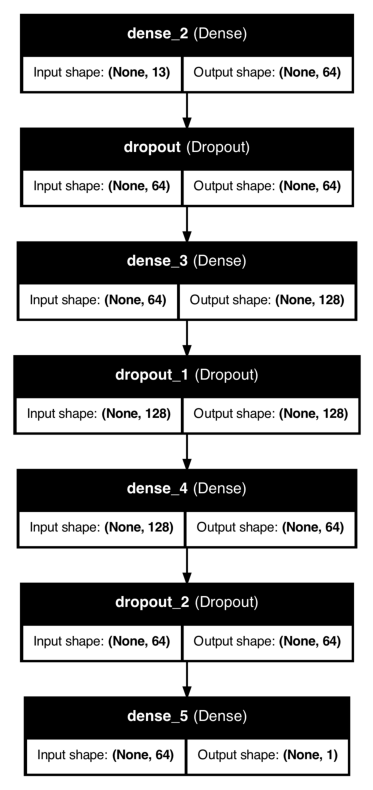

In [522]:
from keras.utils import plot_model

plot_model(neural_network_model, to_file='improved_model.png', show_shapes=True, show_layer_names=True)
img = edhd_plot.imread('improved_model.png')
edhd_plot.figure(figsize=(10, 10))
edhd_plot.imshow(img)
edhd_plot.axis('off')
edhd_plot.show()


In [523]:
neural_network_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,537 (68.50 KB)

 Trainable params: 17,537 (68.50 KB)

 Non-trainable params: 0 (0.00 B)

In [526]:
history = neural_network_model.fit(edhd_X_trainValue, edhd_y_trainValue, validation_data = (edhd_X_textValue, edhd_y_textValue), epochs = 20, verbose = 1)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6068 - loss: 0.6626 - val_accuracy: 0.7349 - val_loss: 0.6367
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - loss: 0.6400 - val_accuracy: 0.7952 - val_loss: 0.5971
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.6030 - val_accuracy: 0.7831 - val_loss: 0.5531
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.5478 - val_accuracy: 0.7952 - val_loss: 0.5108
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4839 - val_accuracy: 0.7952 - val_loss: 0.4780
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.5039 - val_accuracy: 0.7831 - val_loss: 0.4586
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.4759 - val_accuracy: 0.7952 - val_loss: 0.4500
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7450 - loss: 0.4685 - val_accuracy: 0.7831 - val_loss: 0.4401
Epoch 9/

In [527]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score ,f1_score, roc_curve, auc, roc_auc_score,precision_recall_curve
y_pred = neural_network_model.predict(edhd_X_textValue)
precisionVal, recallVal, thresholdsVal = precision_recall_curve(edhd_y_textValue, neural_network_model.predict(edhd_X_textValue, verbose = True))
threshold = edhd_np.mean(thresholdsVal)
yPredBinary = (y_pred > threshold).astype(int)
dnn_accuracy = history.history['val_accuracy']
cm = confusion_matrix(edhd_y_textValue, yPredBinary)
class_report = classification_report(edhd_y_textValue, yPredBinary)
print(cm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
[[34  6]
 [ 7 36]]


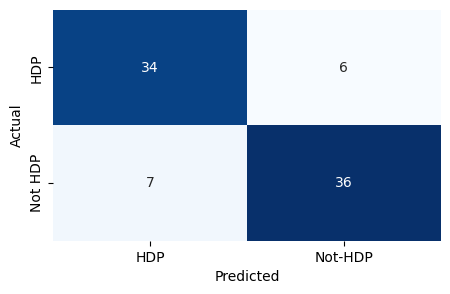

In [528]:
edhd_plot.figure(figsize=(5, 3))
edhd_sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['HDP', 'Not-HDP'], yticklabels=['HDP', 'Not HDP'])
edhd_plot.xlabel('Predicted')
edhd_plot.ylabel('Actual')
edhd_plot.show()

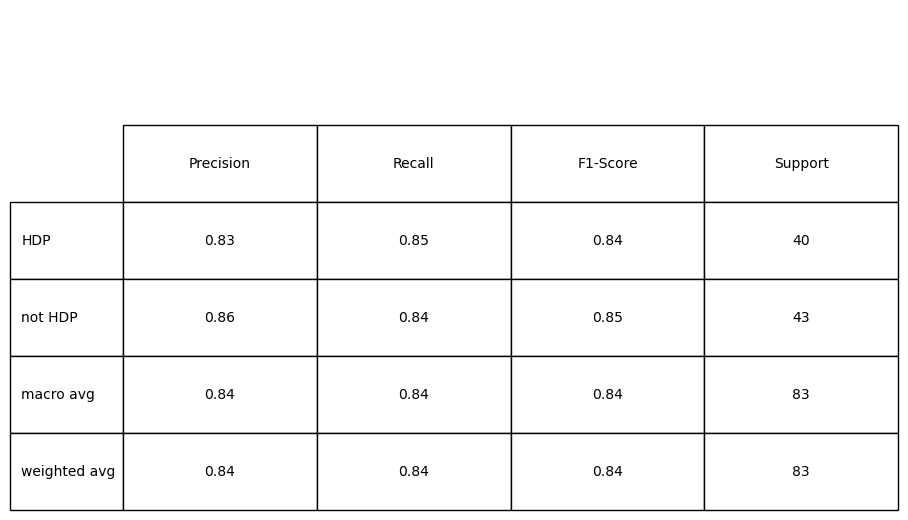

In [532]:
dataLines = class_report.split('\n')
classes = ['HDP','not HDP','macro avg','weighted avg']
table_data = []

for eachLine in dataLines[2:]:
    if eachLine.strip() and not eachLine.strip().startswith(('accuracy')):
        t = eachLine.split()
        v = []
        for x in t[1:]:
            if (x != 'avg'):
                v.append(x)
        table_data.append(v)
table_data


fig, ax = edhd_plot.subplots(figsize=(10, 5))
ax.axis('off')

ax.table(cellText=table_data, colLabels=['Precision', 'Recall', 'F1-Score', 'Support'],
         rowLabels=classes, cellLoc='center', loc='top',
         bbox=[0, -0.3, 1, 1])
edhd_plot.show()

In [534]:
# function to plot the history
def plotModelLossGain(modelHis):
    f = edhd_plot.figure()
    f.set_figwidth(15)

    f.add_subplot(1, 2, 1)
    edhd_plot.plot(modelHis.history['val_loss'], label='val loss')
    edhd_plot.plot(modelHis.history['loss'], label='train loss')
    edhd_plot.legend()
    edhd_plot.title("Model Loss")

    f.add_subplot(1, 2, 2)
    edhd_plot.plot(modelHis.history['val_accuracy'], label='val accuracy')
    edhd_plot.plot(modelHis.history['accuracy'], label='train accuracy')
    edhd_plot.legend()
    edhd_plot.title("Accuracy")

    edhd_plot.show()

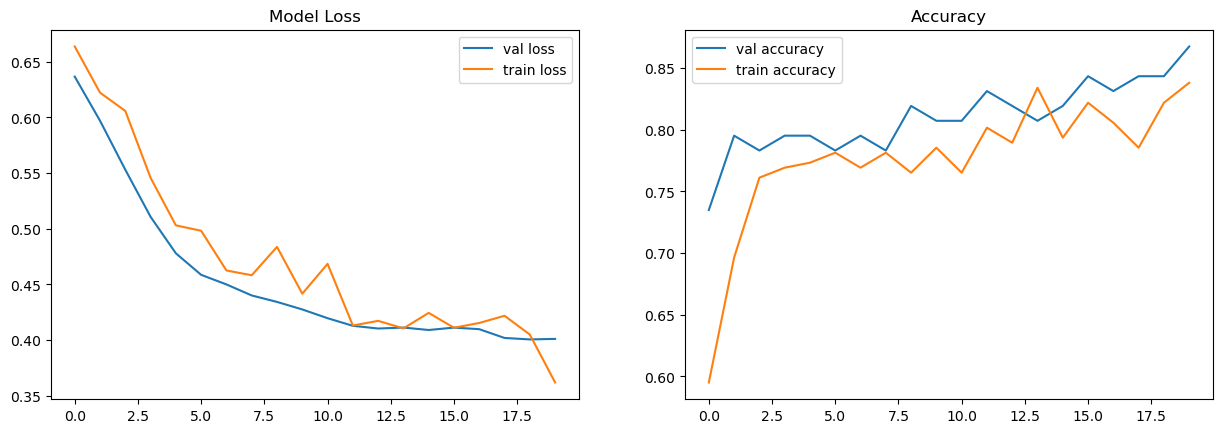

In [536]:
hist = plotModelLossGain(history)

In [538]:
# plotting the area under the Receiver Operating Characteristic (ROC) curve
def plot_auc(tval, pval):
    fpr, tpr, thresholds = roc_curve(tval, pval, pos_label=1)
    fig, c_ax = edhd_plot.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('FPR')
    c_ax.set_ylabel('TPR')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step


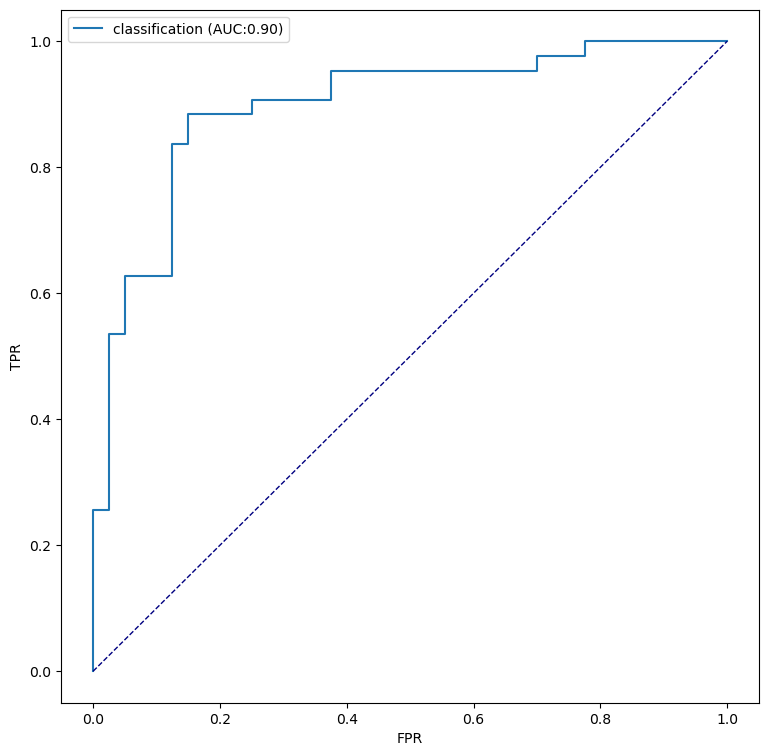

In [540]:
plot_auc(edhd_y_textValue, neural_network_model.predict(edhd_X_textValue, verbose = True))

In [542]:
#clearing the session to realease memmory
keras.backend.clear_session()

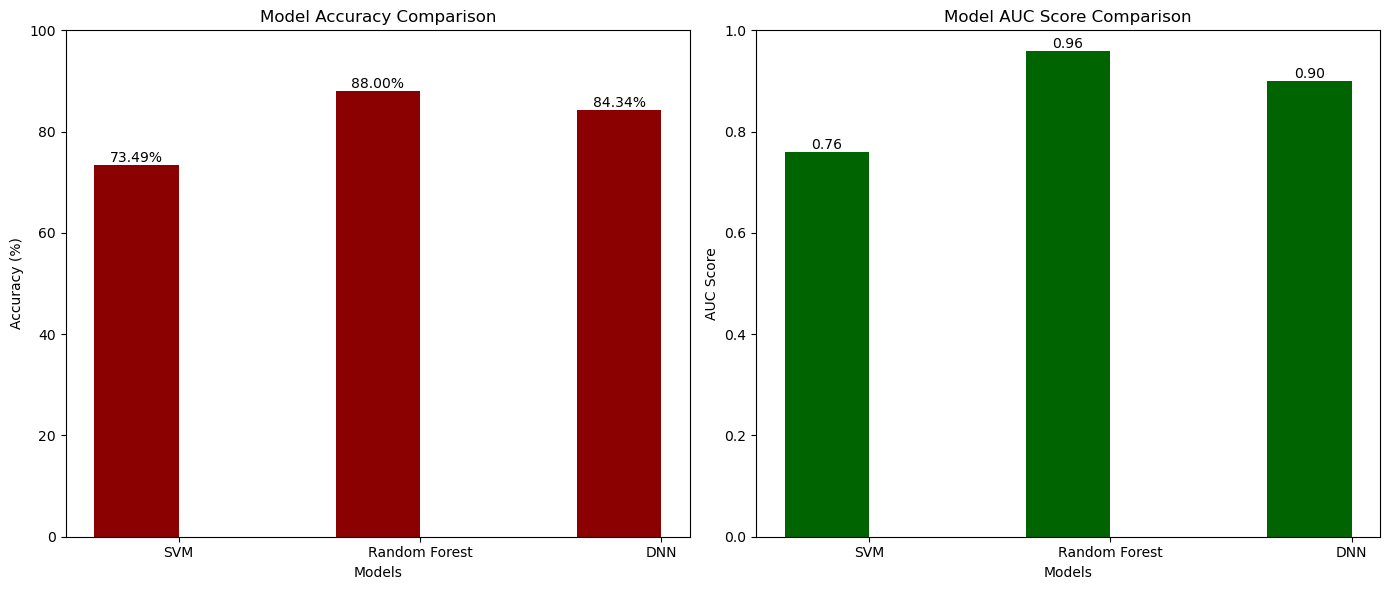

In [544]:
#Data for the three models
models = ['SVM', 'Random Forest', 'DNN']
accuracy = [73.49, 88.00, 84.34]  # Accuracy values in percentage
auc_scores = [0.76, 0.96, 0.90]   # AUC scores

# Define bar width
bar_width = 0.35
index = edhd_np.arange(len(models))

# Create a figure and axis for subplots
fig, (ax1, ax2) = edhd_plot.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy
bars_accuracy = ax1.bar(index - bar_width / 2, accuracy, bar_width, color='darkred', label='Accuracy')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticks(index)
ax1.set_xticklabels(models)
ax1.set_ylim(0, 100)  # Accuracy percentage range

# Annotate the accuracy bars
for bar in bars_accuracy:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Plot AUC Scores
bars_auc = ax2.bar(index - bar_width / 2, auc_scores, bar_width, color='darkgreen', label='AUC Score')
ax2.set_xlabel('Models')
ax2.set_ylabel('AUC Score')
ax2.set_title('Model AUC Score Comparison')
ax2.set_xticks(index)
ax2.set_xticklabels(models)
ax2.set_ylim(0, 1)  # AUC score range

# Annotate the AUC bars
for bar in bars_auc:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjust layout
edhd_plot.tight_layout()

# Show the plots
edhd_plot.show()